<a href="https://colab.research.google.com/github/avs20/SioLabsPython0/blob/main/22_Matplotlib_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
data = pd.read_csv('train.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
# creating a new column 
data['age_cat'] = 'children'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age_cat      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [6]:
data.age_cat

0      children
1      children
2      children
3      children
4      children
         ...   
886    children
887    children
888    children
889    children
890    children
Name: age_cat, Length: 891, dtype: object

In [7]:
# where age is between 0 and 2 I have to set this column as infant 
data.loc[data.Age <= 2, 'age_cat'] = 'infant'
data.age_cat.value_counts()

children    867
infant       24
Name: age_cat, dtype: int64

In [8]:
# where age is > 14 I have to set this column as adult
data.loc[data.Age  > 14, 'age_cat'] = 'adult'
data.age_cat.value_counts()

adult       637
children    230
infant       24
Name: age_cat, dtype: int64

aalsi solutoin 

apply()
-------

we can pass a function to this and this apply() will apply that function to columns or rows or everything 

In [9]:
def get_age_cat(age):
  if age <= 2:
    return 'infant'
  elif age <= 14:
    return 'children'
  else:
    return 'adult'



In [10]:
data['age_cat'] = data.Age.apply(get_age_cat)

In [11]:
data['age_cat'].head(10)

0       adult
1       adult
2       adult
3       adult
4       adult
5       adult
6       adult
7      infant
8       adult
9    children
Name: age_cat, dtype: object

In [12]:
def get_salutation(row):
  if row.Sex == 'male' and row.Age < 14:
    return 'Master'
  elif row.Sex == 'male' and row.Age >= 14:
    return 'Mr.'
  elif row.Sex == 'female' and row.Age < 14:
    return 'Miss'
  elif row.Sex == 'female' and row.Age >= 14:
    return 'Mrs.'

data.apply(get_salutation, axis = 1)

0       Mr.
1      Mrs.
2      Mrs.
3      Mrs.
4       Mr.
       ... 
886     Mr.
887    Mrs.
888    None
889     Mr.
890     Mr.
Length: 891, dtype: object

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult


Visualization 
--------

showing data 
representing data in some image form. 

In [14]:
g_var = data.groupby('Sex')['Survived'].value_counts()

In [15]:
un_var  = data.groupby('Sex')['Survived'].value_counts().unstack()

In [16]:
g_var.index

MultiIndex([('female', 1),
            ('female', 0),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])

In [17]:
g_var

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [18]:
un_var.index

Index(['female', 'male'], dtype='object', name='Sex')

In [19]:
un_var

Survived,0,1
Sex,,
female,81,233
male,468,109


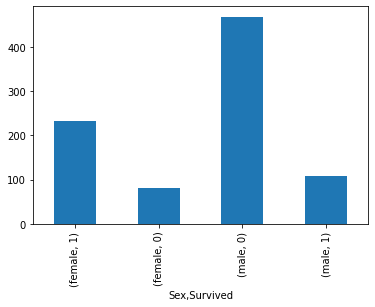

In [20]:
data.groupby('Sex')['Survived'].value_counts().plot(kind="bar")

matplotlib - pyplot

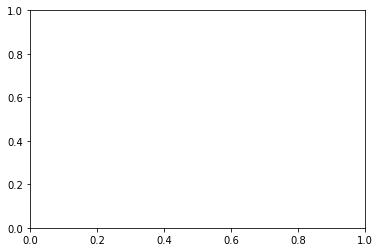

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
plt.show()

In [22]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult


In [23]:
df = pd.read_csv('/content/seattle_weather.csv')

In [24]:
df['MLY-TAVG-NORMAL']

0      39.3
1      40.7
2      43.8
3      47.4
4      53.1
       ... 
199    66.7
200    61.5
201    52.9
202    45.5
203    40.3
Name: MLY-TAVG-NORMAL, Length: 204, dtype: float64

In [25]:
df.rename(columns = {'DATE':'MONTH'}, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATION                  204 non-null    object 
 1   NAME                     204 non-null    object 
 2   MONTH                    204 non-null    int64  
 3   MLY-CLDD-BASE45          180 non-null    float64
 4   MLY-CLDD-BASE50          180 non-null    float64
 5   MLY-CLDD-BASE55          180 non-null    float64
 6   MLY-CLDD-BASE57          180 non-null    float64
 7   MLY-CLDD-BASE60          180 non-null    float64
 8   MLY-CLDD-BASE70          180 non-null    float64
 9   MLY-CLDD-BASE72          180 non-null    float64
 10  MLY-CLDD-NORMAL          180 non-null    float64
 11  MLY-DUTR-NORMAL          180 non-null    float64
 12  MLY-DUTR-STDDEV          180 non-null    float64
 13  MLY-GRDD-BASE40          180 non-null    float64
 14  MLY-GRDD-BASE45          1

In [27]:
df['MONTH'][:24]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12     1
13     2
14     3
15     4
16     5
17     6
18     7
19     8
20     9
21    10
22    11
23    12
Name: MONTH, dtype: int64

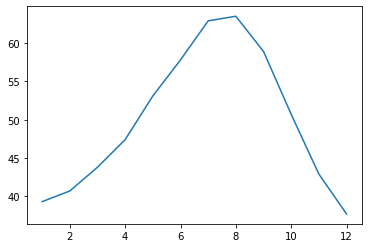

In [28]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] )
plt.show()

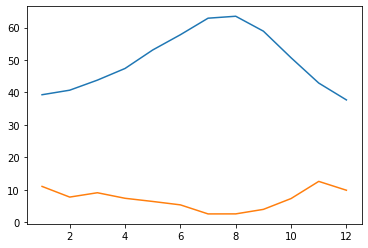

In [29]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] )
ax.plot(df['MONTH'][:12], df['MLY-PRCP-NORMAL'][:12] )
plt.show()

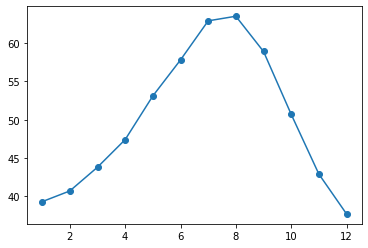

In [30]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "o")
plt.show()

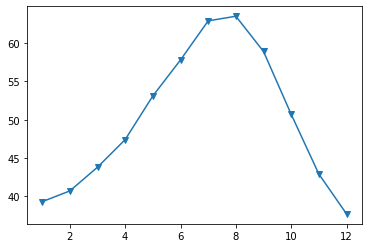

In [31]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v")
plt.show()

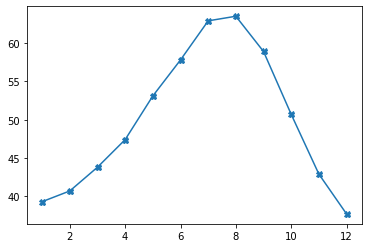

In [32]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "X")
plt.show()

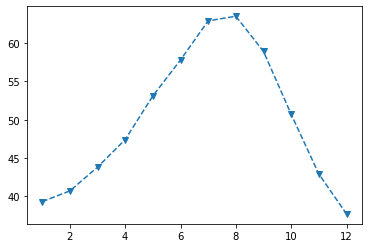

In [33]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" )
plt.show()

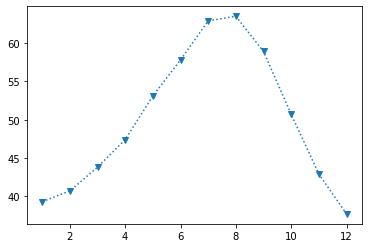

In [34]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = ":" )
plt.show()

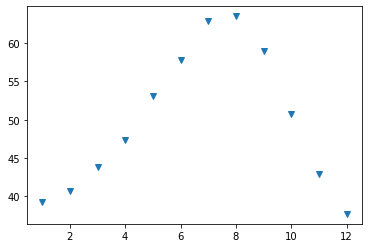

In [35]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "None" )
plt.show()

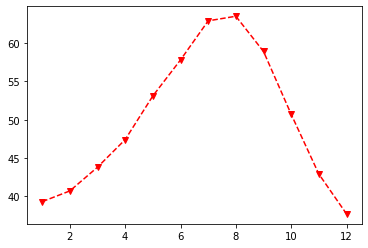

In [36]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="r")
plt.show()

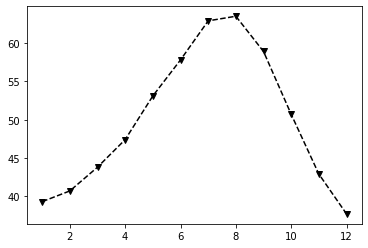

In [37]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
plt.show()

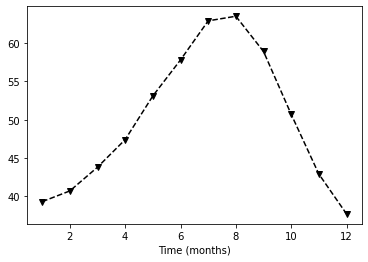

In [38]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax.set_xlabel("Time (months)")
plt.show()

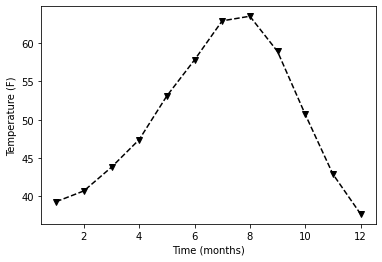

In [39]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax.set_xlabel("Time (months)")
# set y label 
ax.set_ylabel("Temperature (F)")
plt.show()

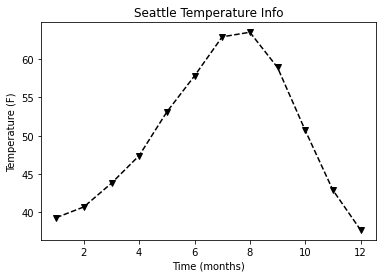

In [40]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax.set_xlabel("Time (months)")
# set y label 
ax.set_ylabel("Temperature (F)")
# set tile 
ax.set_title('Seattle Temperature Info')
plt.show()

In [41]:
df[['MONTH', 'MLY-TAVG-NORMAL']][:12]

,MONTH,MLY-TAVG-NORMAL
0,1,39.3
1,2,40.7
2,3,43.8
3,4,47.4
4,5,53.1
5,6,57.8
6,7,62.9
7,8,63.5
8,9,58.9
9,10,50.7


Subplots
-----



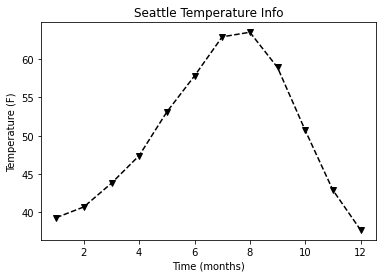

In [42]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax.set_xlabel("Time (months)")
# set y label 
ax.set_ylabel("Temperature (F)")
# set tile 
ax.set_title('Seattle Temperature Info')
plt.show()

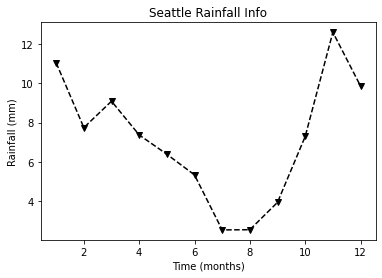

In [43]:
fig, ax = plt.subplots()
# to make line plot use plot
ax.plot(df['MONTH'][:12], df['MLY-PRCP-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax.set_xlabel("Time (months)")
# set y label 
ax.set_ylabel("Rainfall (mm)")
# set tile 
ax.set_title('Seattle Rainfall Info')
plt.show()

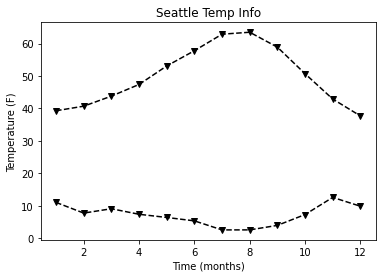

In [44]:
fig, ax = plt.subplots()
# to make line plot use plot
# for temp
ax.plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# for rainfall
ax.plot(df['MONTH'][:12], df['MLY-PRCP-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")

# set x label 
ax.set_xlabel("Time (months)")
# set y label 
ax.set_ylabel("Temperature (F)")
# set tile 
ax.set_title('Seattle Temp Info')
##################

plt.show()

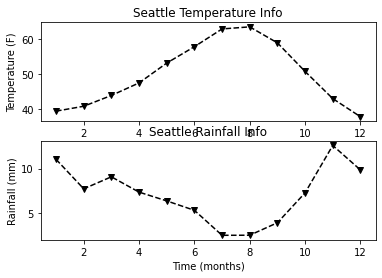

In [45]:
fig, ax = plt.subplots(2,1)
# to make line plot use plot
ax[0].plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax[0].set_xlabel("Time (months)")
# set y label 
ax[0].set_ylabel("Temperature (F)")
# set tile 
ax[0].set_title('Seattle Temperature Info')

##############
# to make line plot use plot
ax[1].plot(df['MONTH'][:12], df['MLY-PRCP-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax[1].set_xlabel("Time (months)")
# set y label 
ax[1].set_ylabel("Rainfall (mm)")
# set tile 
ax[1].set_title('Seattle Rainfall Info')
plt.show()



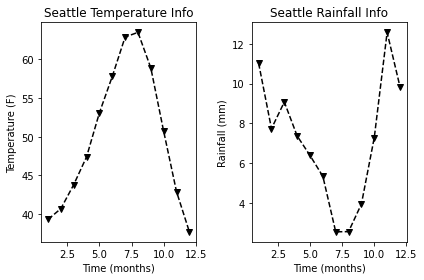

In [48]:
fig, ax = plt.subplots(1,2)
# to make line plot use plot
ax[0].plot(df['MONTH'][:12], df['MLY-TAVG-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax[0].set_xlabel("Time (months)")
# set y label 
ax[0].set_ylabel("Temperature (F)")
# set tile 
ax[0].set_title('Seattle Temperature Info')

##############
# to make line plot use plot
ax[1].plot(df['MONTH'][:12], df['MLY-PRCP-NORMAL'][:12] , marker = "v", linestyle = "--" , color="black")
# set x label 
ax[1].set_xlabel("Time (months)")
# set y label 
ax[1].set_ylabel("Rainfall (mm)")
# set tile 
ax[1].set_title('Seattle Rainfall Info')
plt.tight_layout()
plt.show()

New Class
-----
Differnet Type of data
------


In [49]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [53]:
data = pd.read_csv('/content/medals_by_country_2016.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     object
 1   Bronze      10 non-null     int64 
 2   Gold        10 non-null     int64 
 3   Silver      10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [54]:
data.rename(columns = {'Unnamed: 0': 'Country'}, inplace=True)
data.head()

,Country,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55
3,Russia,35,50,28
4,China,35,44,30


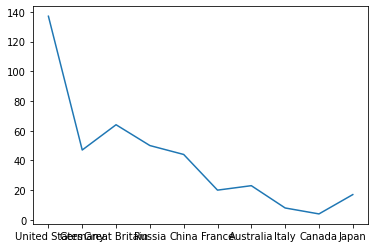

In [56]:
fig, ax = plt.subplots()
ax.plot(data['Country'], data['Gold'])
plt.show()

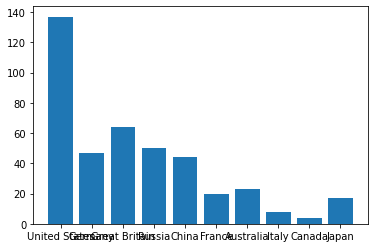

In [57]:
# how ot make bar plots 
fig, ax = plt.subplots()
ax.bar(data['Country'], data['Gold'])
plt.show()

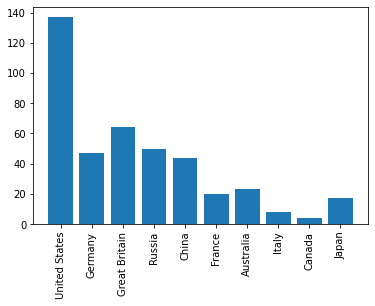

In [58]:
# how ot make bar plots 
fig, ax = plt.subplots()
ax.bar(data['Country'], data['Gold'])
ax.set_xticklabels(data['Country'], rotation =90)
plt.show()

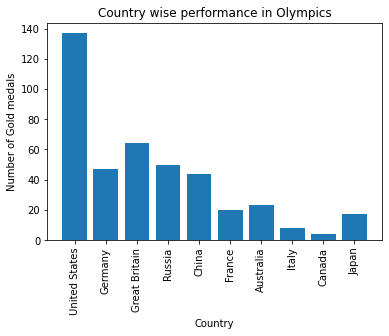

In [60]:
# how ot make bar plots 
fig, ax = plt.subplots()
ax.bar(data['Country'], data['Gold'])
ax.set_xticklabels(data['Country'], rotation =90)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Gold medals')
ax.set_title('Country wise performance in Olympics')
plt.show()

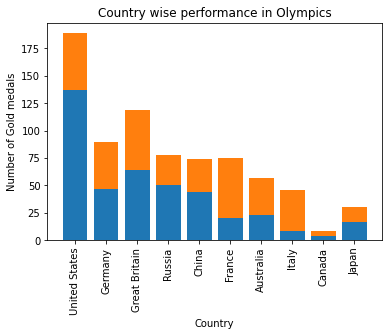

In [62]:
# how ot make bar plots 
fig, ax = plt.subplots()
ax.bar(data['Country'], data['Gold'])
ax.bar(data['Country'], data['Silver'], bottom = data['Gold'])
ax.set_xticklabels(data['Country'], rotation =90)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Gold medals')
ax.set_title('Country wise performance in Olympics')
plt.show()

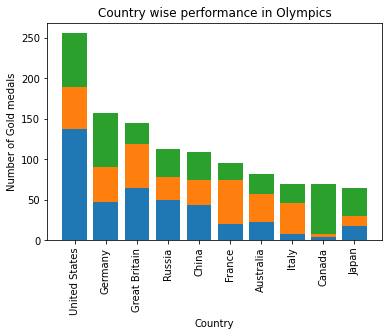

In [64]:
# how ot make bar plots 
fig, ax = plt.subplots()
ax.bar(data['Country'], data['Gold'])
ax.bar(data['Country'], data['Silver'], bottom = data['Gold'])
ax.bar(data['Country'], data['Bronze'], bottom = data['Gold'] + data['Silver'])
ax.set_xticklabels(data['Country'], rotation =90)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Gold medals')
ax.set_title('Country wise performance in Olympics')
plt.show()

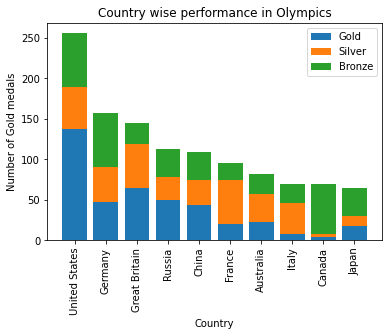

In [65]:
# how ot make bar plots 
fig, ax = plt.subplots()
ax.bar(data['Country'], data['Gold'], label = "Gold")
ax.bar(data['Country'], data['Silver'], bottom = data['Gold'], label = "Silver")
ax.bar(data['Country'], data['Bronze'], bottom = data['Gold'] + data['Silver'], label = "Bronze")
ax.set_xticklabels(data['Country'], rotation =90)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Gold medals')
ax.set_title('Country wise performance in Olympics')
ax.legend()
plt.show()

In [66]:
data = pd.read_csv('train.csv')
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

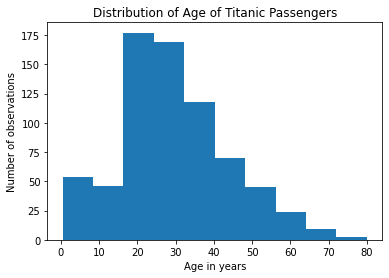

In [69]:
fig, ax = plt.subplots()
ax.hist(data.Age[~data.Age.isna()])
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of observations')
ax.set_title('Distribution of Age of Titanic Passengers')
plt.show()

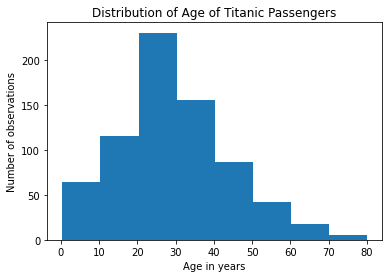

In [70]:
fig, ax = plt.subplots()
ax.hist(data.Age[~data.Age.isna()], bins = 8)
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of observations')
ax.set_title('Distribution of Age of Titanic Passengers')
plt.show()

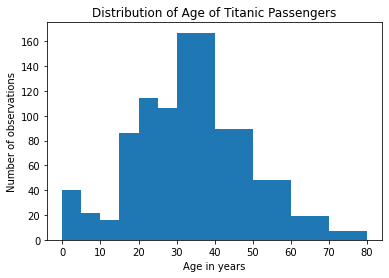

In [71]:
fig, ax = plt.subplots()
ax.hist(data.Age[~data.Age.isna()], bins = [0,5,10,15,20,25,30,40,50,60,70,80])
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of observations')
ax.set_title('Distribution of Age of Titanic Passengers')
plt.show()

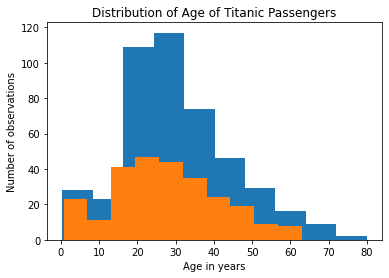

In [72]:
males = data[data.Sex == 'male']
females = data[data.Sex == 'female']


fig, ax = plt.subplots()
ax.hist(males.Age[~males.Age.isna()])
ax.hist(females.Age[~females.Age.isna()])
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of observations')
ax.set_title('Distribution of Age of Titanic Passengers')
plt.show()

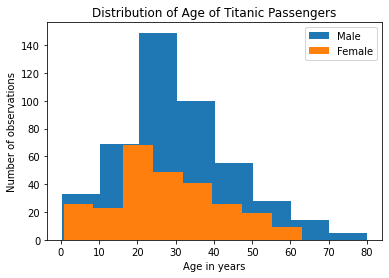

In [75]:
fig, ax = plt.subplots()
ax.hist(males.Age[~males.Age.isna()], label = 'Male', bins = 8)
ax.hist(females.Age[~females.Age.isna()], label = 'Female', bins = 8)
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of observations')
ax.set_title('Distribution of Age of Titanic Passengers')
ax.legend()
plt.show()

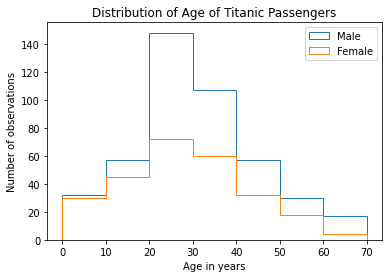

In [78]:
fig, ax = plt.subplots()
ax.hist(males.Age[~males.Age.isna()], label = 'Male', bins = range(0,80,10), histtype='step')
ax.hist(females.Age[~females.Age.isna()], label = 'Female', bins = range(0,80,10), histtype='step')
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of observations')
ax.set_title('Distribution of Age of Titanic Passengers')
ax.legend()
plt.show()